In [8]:
import numpy as np
import pandas as pd
from scipy import integrate
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## Estimating the CDF - Quadrature (Newton-Cotes Integration)
### Basic Quadrature (integrating f(x) over two real points):
• Fix the so-called abscissas or grid points xi and sample the function f at these points;

• Approximate function f by an interpolating polynomial pn of order n in a way that pn (xi) = f (xi) for all i’s;

• Integrate pn and return I(pn) as approximation to I(f).

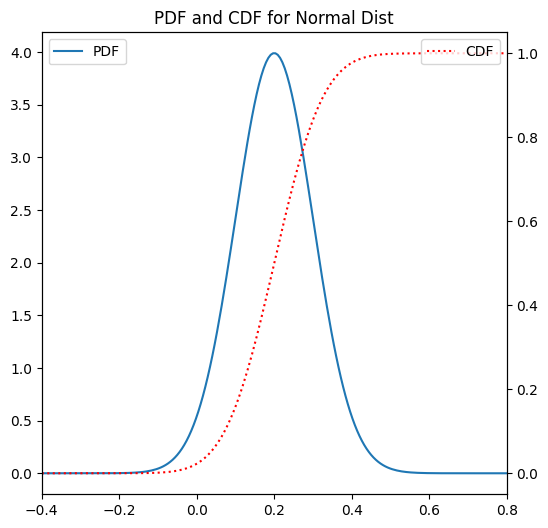

In [21]:
# Question 1
mu, sigma = 0.2, 0.1
a,b = -0.4, 0.8 #truncation
nsteps=200
nsample=10^6
x = np.linspace(a,b,nsteps)
f = stats.norm.pdf(x,mu,sigma)
F = stats.norm.cdf(x,mu,sigma)

fig, ax = plt.subplots(figsize=(6,6), sharex=True)
plt.title('PDF and CDF for Normal Dist')
ax.plot(x,f, label='PDF')
ax.set_xlim(a,b)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(x, F, 'r:', label='CDF')
ax2.legend(loc='upper right')

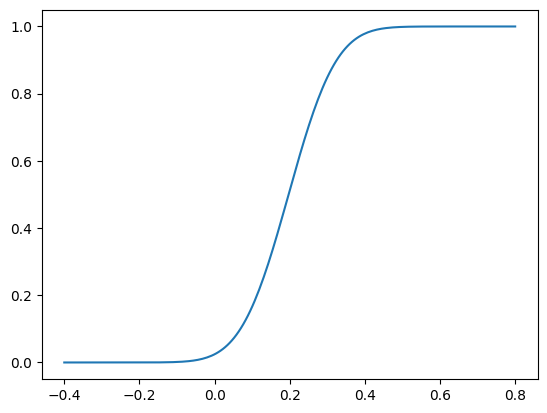

In [3]:
# Part a - approxiate the normal CDF using cumsum
# Rectangle Rule
dx = x[1]-x[0]
Fs = np.cumsum(f)*dx
plt.plot(x,Fs)

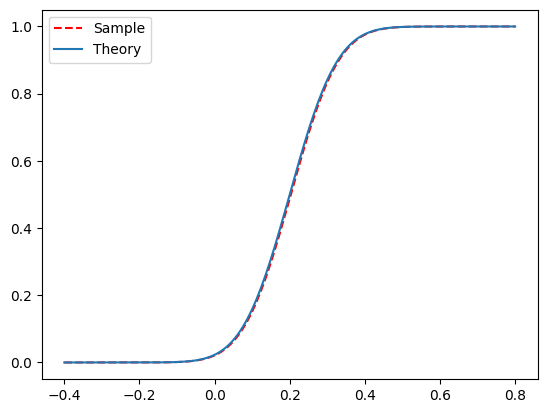

In [4]:
#b) use for loop and sum instead of cumsum
cdf = []
for i in range(len(f)):
    val = np.sum(f[0:i])*dx
    cdf.append(val)
plt.plot(x,cdf, 'r--',label = 'Sample')
plt.plot(x,F, label='Theory')
plt.legend(loc=0)

(-0.4, 0.8)

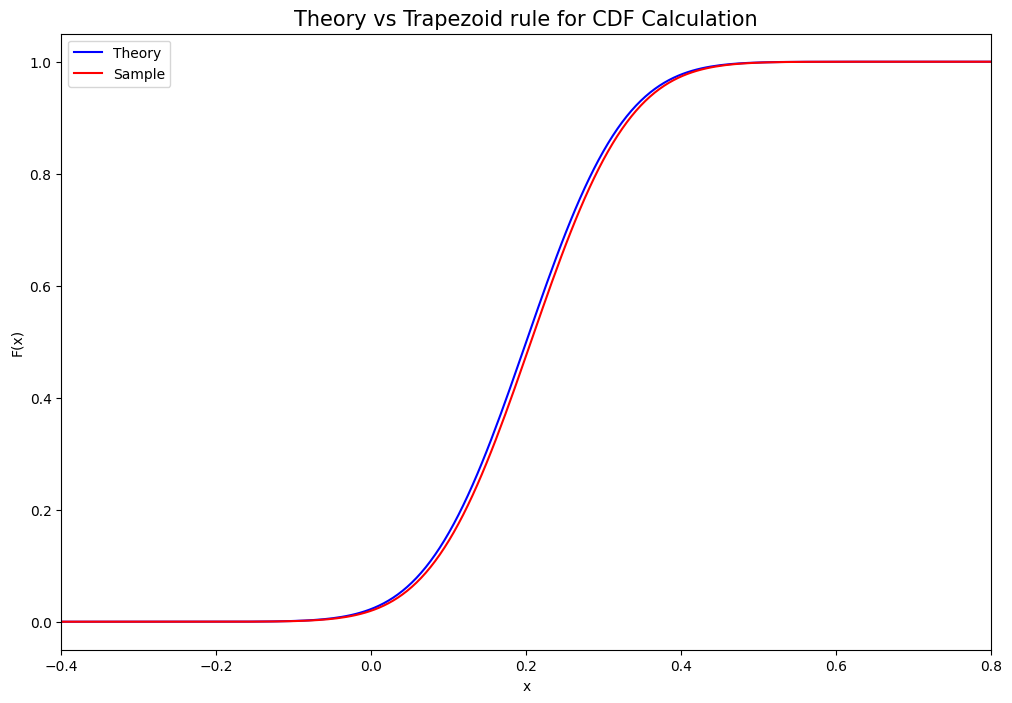

In [5]:
#c) First and last integration weights 0.5 while others 1 (trapezoidal rule)
# can sub sum with trapz. Show this produces a better result for CDF
Fc = []
dx = x[1]-x[0]
for i in range(len(f)):
    val = integrate.trapezoid(f[1:i]) * dx
    Fc.append(val)

fig,axes = plt.subplots(1,1,figsize=(12,8),sharey=True)
axes.plot(x,F, c='b',label='Theory')
axes.plot(x,Fc,c='r',label='Sample')
axes.legend(loc=0)
axes.set_title('Theory vs Trapezoid rule for CDF Calculation', size=15)
axes.set_xlabel('x')
axes.set_ylabel('F(x)')
axes.set_xlim(a,b)

(-0.4, 0.8)

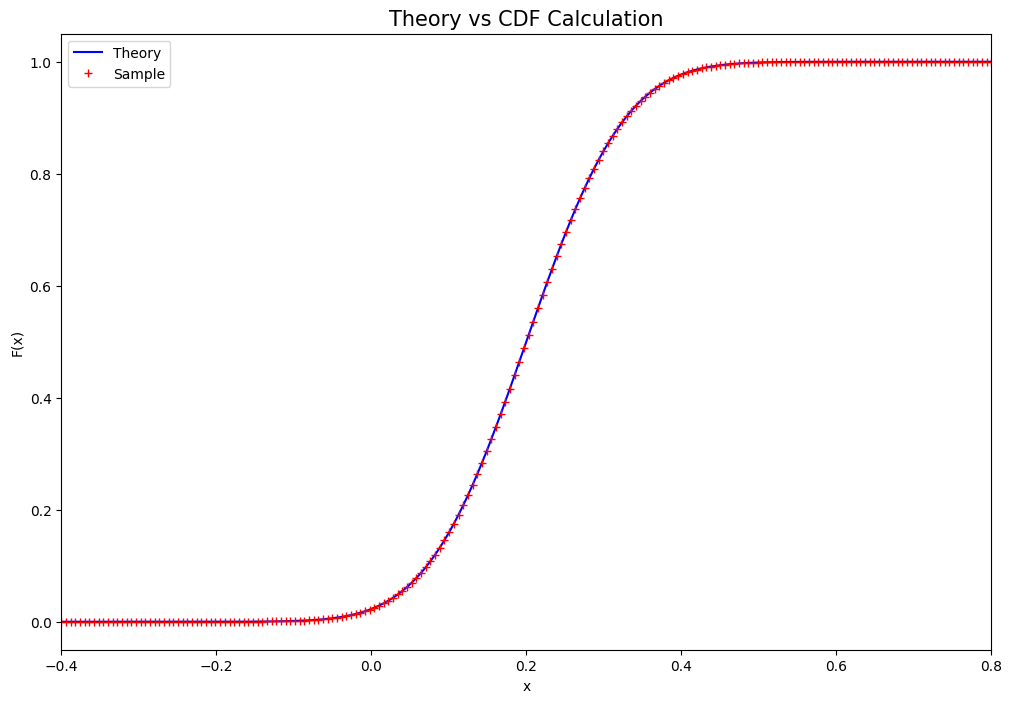

In [6]:
# d) - Repeat c) without trap function or sum
Fd = np.zeros(len(f))
dx = x[1]-x[0]
Fd[0] = f[0]
Fd[1] = 0.5 * (f[0]+f[1]) * dx
for i in range(2,len(f)):
    val = Fd[i-1]+ 0.5*(f[i] +f[i-1])*dx
    Fd[i]=val

fig,axes = plt.subplots(1,1,figsize=(12,8),sharey=True)
axes.plot(x,F, c='b',label='Theory')
axes.plot(x,Fd,'r+',label='Sample')
axes.legend(loc=0)
axes.set_title('Theory vs CDF Calculation', size=15)
axes.set_xlabel('x')
axes.set_ylabel('F(x)')
axes.set_xlim(a,b)

(-0.4, 0.8)

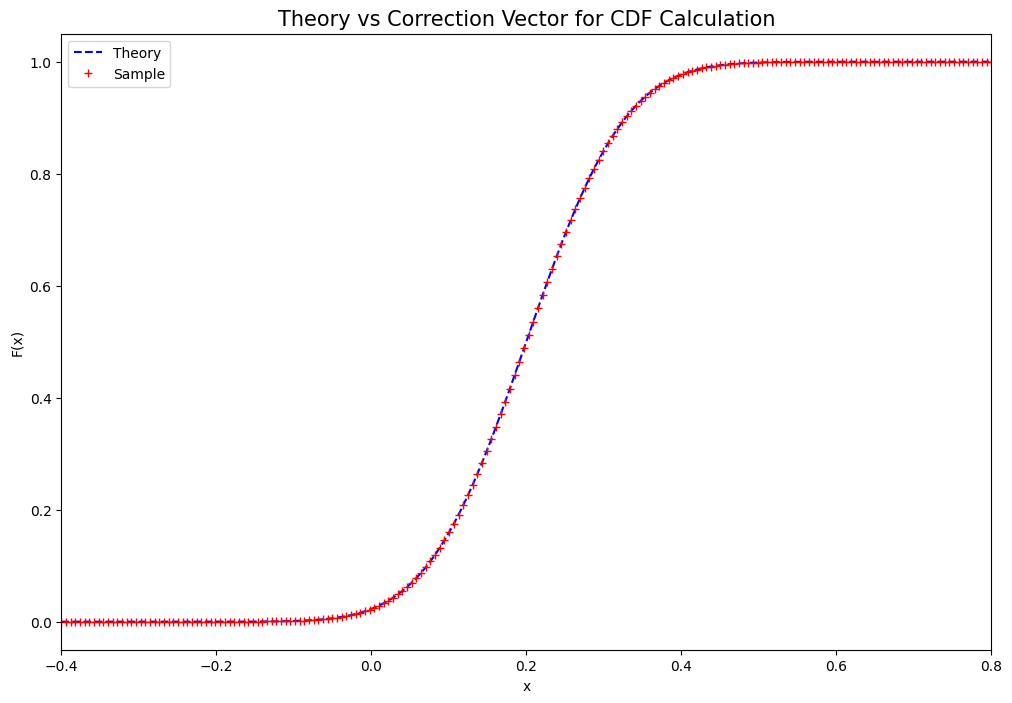

In [7]:
# e) - Repeat c without a for loop, applying a correction vector to cumsum
dx = x[1]-x[0]
Fe = np.cumsum(f) - 0.5*(f[0]+f)
Fe[0] = f[0]
Fe = Fe * dx

fig,axes = plt.subplots(1,1,figsize=(12,8),sharey=True)
axes.plot(x,F, 'b--',label='Theory')
axes.plot(x,Fe,'r+',label='Sample')
axes.legend(loc=0)
axes.set_title('Theory vs Correction Vector for CDF Calculation', size=15)
axes.set_xlabel('x')
axes.set_ylabel('F(x)')
axes.set_xlim(a,b)


In [8]:
# f) 
half = nsteps/2
lower= int(half - 5)
upper = int(half + 5)
names = ['Theory:', 'Cumsum:', 'Trap Int:','For Loop:','Correction Term:']
cdfs = [F,Fs,Fc,Fd,Fe]
questions = zip(names, cdfs) 
for i,j in questions:
    print(i)
    print(f'First 10:{j[:10]}\n\nCentral 10:{j[lower:upper]}')
    print('____\n')

Theory:
First 10:[9.86587645e-10 1.42773376e-09 2.05881881e-09 2.95834659e-09
 4.23585138e-09 6.04357383e-09 8.59229446e-09 1.21727145e-08
 1.71842058e-08 2.41733058e-08]

Central 10:[0.39305832 0.41642207 0.44008498 0.46396391 0.48797341 0.51202659
 0.53603609 0.55991502 0.58357793 0.60694168]
____

Cumsum:
First 10:[3.66384895e-10 8.91530369e-10 1.64149793e-09 2.70864953e-09
 4.22162033e-09 6.35887247e-09 9.36703822e-09 1.35856402e-08
 1.94802644e-08 2.76868876e-08]

Central 10:[0.40468355 0.4282105  0.4519955  0.47595411 0.5        0.52404589
 0.5480045  0.5717895  0.59531645 0.61850367]
____

Trap Int:
First 10:[0.0, 0.0, 0.0, 6.375565177693381e-10, 1.5461160978553035e-09, 2.836177297061344e-09, 4.66128876715446e-09, 7.233997712139445e-09, 1.084738157114953e-08, 1.5903994683660633e-08]

Central 10:[0.3701116024432352, 0.3930899407381804, 0.4164470244038268, 0.44010299853296425, 0.4639748047036707, 0.48797705417114196, 0.5120229429421017, 0.5360251924095729, 0.5598969985802794, 0.58

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_76646/2497869125.py:7: SyntaxWarning: invalid escape sequence '\m'
  axes.set_title(f'Normal Dist. CDFs with $\mu$ = {mu} and $\sigma$ = {sigma}', size=18)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_76646/2497869125.py:7: SyntaxWarning: invalid escape sequence '\s'
  axes.set_title(f'Normal Dist. CDFs with $\mu$ = {mu} and $\sigma$ = {sigma}', size=18)


(-0.4, 0.8)

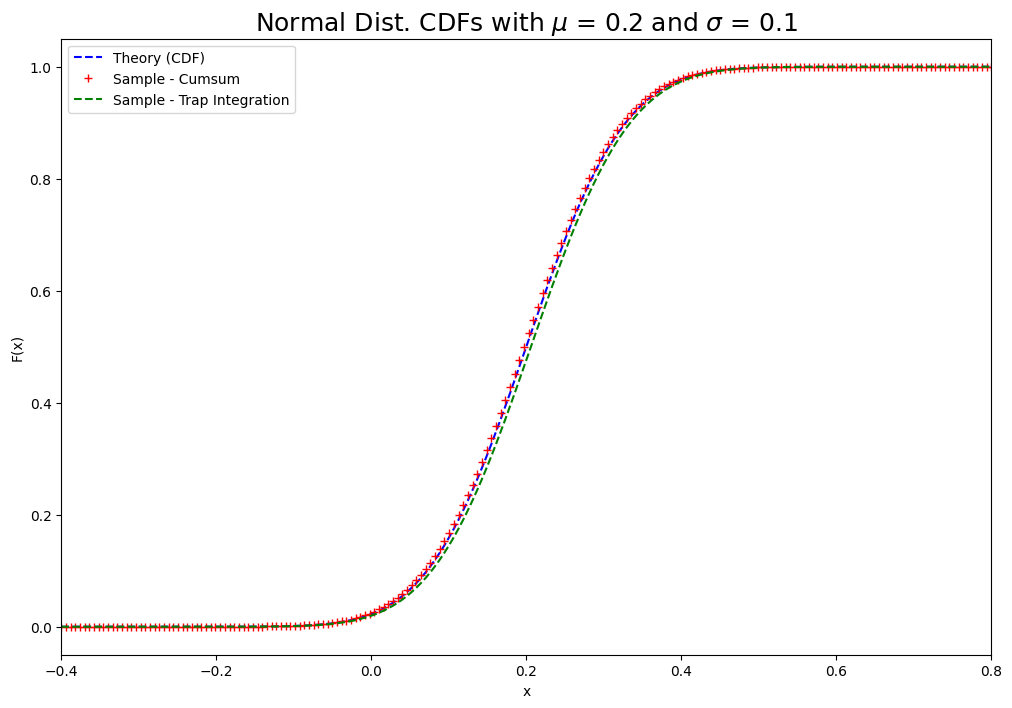

In [9]:
# g) - Plot CDF of theory, cumsum and trapz
fig,axes = plt.subplots(1,1,figsize=(12,8),sharey=True)
axes.plot(x,F, 'b--',label='Theory (CDF)')
axes.plot(x,Fs,'r+',label='Sample - Cumsum')
axes.plot(x,Fc, 'g--',label='Sample - Trap Integration')
axes.legend(loc=0)
axes.set_title(f'Normal Dist. CDFs with $\mu$ = {mu} and $\sigma$ = {sigma}', size=18)
axes.set_xlabel('x')
axes.set_ylabel('F(x)')
axes.set_xlim(a,b)

### Newton-Cote

In [10]:
import numpy as np
from scipy.special import gamma

def gamma_pdf(x, k, theta):
    return (x**(k-1) * np.exp(-x/theta)) / (theta**k * gamma(k))

def newton_cotes_integration(a, b, n, k, theta):
    h = (b - a) / n
    result = 0.5 * (gamma_pdf(a, k, theta) + gamma_pdf(b, k, theta))
    
    for i in range(1, n):
        result += gamma_pdf(a + i * h, k, theta)

    result *= h
    return result

# Parameters for the gamma distribution
k = 2.5
theta = 1.0

# Integration bounds
a = 0
b = 5

# Number of subintervals for the trapezoidal rule
n = 1000

# Perform Newton-Cotes integration estimate
integral_estimate = newton_cotes_integration(a, b, n, k, theta)
print("Newton-Cotes Integration Estimate:", integral_estimate)


Newton-Cotes Integration Estimate: 0.9247646372640734


### Mid-point rule

In [11]:
import numpy as np
from scipy.special import gamma

def gamma_pdf(x, k, theta):
    return (x**(k-1) * np.exp(-x/theta)) / (theta**k * gamma(k))

# def midpoint_rule_integration(a, b, n, k, theta):
#     h = (b - a) / n
#     result = 0.0

#     for i in range(n):
#         mid_point = a + (i + 0.5) * h
#         result += gamma_pdf(mid_point, k, theta)

#     result *= h
#     return result
i = 1
mp = []
for j in range(11):
    m = 2**j+1
    x=np.linspace(a,b,m)
    h = x[1]-x[0]
    xmid = x+h/2
    mp.append(np.sum(xmid[1:-1])*h)


# Parameters for the gamma distribution
k = 2.5
theta = 1.0

# Integration bounds
a = 0
b = 5

# Number of subintervals for the midpoint rule
n = 1000

# Perform midpoint rule integration estimate
# integral_estimate = midpoint_rule_integration(a, b, n, k, theta)

print("Midpoint Rule Integration Estimate:", integral_estimate)

Midpoint Rule Integration Estimate: 0.9247646372640734


### Simpsons Rule

In [12]:
import numpy as np
from scipy.special import gamma

def gamma_pdf(x, k, theta):
    return (x**(k-1) * np.exp(-x/theta)) / (theta**k * gamma(k))

def simpsons_rule_integration(a, b, n, k, theta):
    h = (b - a) / n
    result = gamma_pdf(a, k, theta) + gamma_pdf(b, k, theta)

    for i in range(1, n, 2):
        result += 4 * gamma_pdf(a + i * h, k, theta)

    for i in range(2, n-1, 2):
        result += 2 * gamma_pdf(a + i * h, k, theta)

    result *= h / 3
    return result

# Parameters for the gamma distribution
k = 2.5
theta = 1.0

# Integration bounds
a = 0
b = 5

# Number of subintervals for Simpson's rule
n = 1000

# Perform Simpson's rule integration estimate
integral_estimate = simpsons_rule_integration(a, b, n, k, theta)

print("Simpson's Rule Integration Estimate:", integral_estimate)


Simpson's Rule Integration Estimate: 0.9247647727082061


### Error Analysis for the rate of Convergence

1. If we don't know the derivative of f:
- Rectangle rule: p = 1
- mid-point/trap rule: p = 2
- Simpsons rule: p = 4

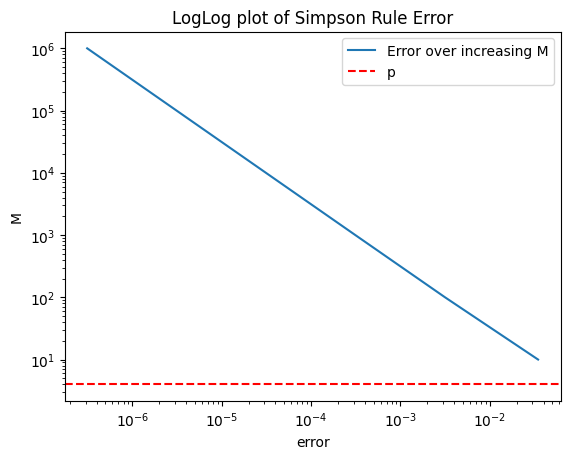

In [13]:
# Est the integral on finer grids (e.g. half length space h)
p = 4
a = 0
b = 5
m = [10,10**2,10**3,10**4,10**5,10**6] # ALL FROM ABOVE SIMPSON RULE

ests = []
for i in m:
    e = (b-a)/(i-1)*1/2**p    
    ests.append(e)

plt.loglog(ests, m, label='Error over increasing M')
plt.axhline(p, c='r', linestyle='--', label='p')
plt.ylabel('M')
plt.xlabel('error')
plt.title('LogLog plot of Simpson Rule Error')
plt.legend(loc=0)
# TENDS TO P FOR LARGE M

2. If the value of the integral is not known:

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_76646/561775154.py:28: RuntimeWarning: divide by zero encountered in log2
  log2_R_values = np.log2(R_values)


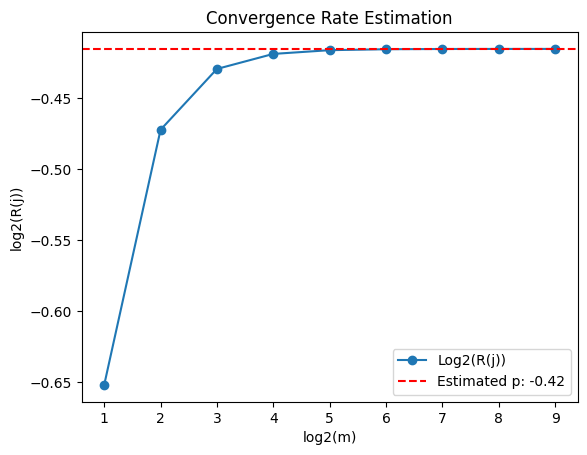

In [25]:
# Define the function to be integrated
def integrand(x):
    return x**2

# Define the range of integration
a, b = 0, 1

# Number of iterations
num_iterations = 10

# Initial values
I_values = np.zeros(num_iterations)
R_values = np.zeros(num_iterations)
log2_R_values = np.zeros(num_iterations)

# Perform iterations
for j in range(num_iterations):
    # Compute the integral for 2**j intervals
    intervals = 2**j
    x_values = np.linspace(a, b, intervals + 1)
    I_values[j] = np.trapz(integrand(x_values), x_values)

# Compute ratios
for j in range(1, num_iterations):
    R_values[j] = (I_values[j] - I_values[j-1] + 1) / (I_values[j] + 1)
    #R_values[j] = (I_values[j] + 1 - I_values[j-1] + 1) / (I_values[j+1] + 1 - I_values[j] + 1)
    
# Take the logarithm
log2_R_values = np.log2(R_values)

# Estimate the convergence rate 'p' for large j
p_estimate = log2_R_values[-1]

# Plot log2(m) versus log2(R(j)^p)
log2_m_values = np.log2(2**np.arange(num_iterations))
plt.plot(log2_m_values, log2_R_values, marker='o', label='Log2(R(j))')
plt.axhline(y=p_estimate, color='r', linestyle='--', label=f'Estimated p: {p_estimate:.2f}')
plt.xlabel('log2(m)')
plt.ylabel('log2(R(j))')
plt.legend()
plt.title('Convergence Rate Estimation')